# Heart Disease Framingham
## Akash patil
### aakashgolu1008@gmail.com

Introduction 
Problem: The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation<br>

Source: The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.<br>

Attributes:<br>

Demographic:<br>
Sex: male or female(Nominal)<br>

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)<br>

Education: no further information provided<br>
Behavioral:<br>

Current Smoker: whether or not the patient is a current smoker (Nominal)<br>

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>

Information on medical history:<br>
BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>

Diabetes: whether or not the patient had diabetes (Nominal)<br>

Information on current medical condition:<br>
Tot Chol: total cholesterol level (Continuous)<br>

Sys BP: systolic blood pressure (Continuous)<br>

Dia BP: diastolic blood pressure (Continuous)<br>

BMI: Body Mass Index (Continuous)<br>

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>

Glucose: glucose level (Continuous)<br>

Target variable to predict:<br>
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)<br>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("Display.max_columns",20)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('framingham.csv')
df.sample(n=15,random_state=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
906,1,53,1.0,0,0.0,0.0,0,0,0,220.0,127.0,76.0,24.27,75.0,74.0,0
857,0,44,1.0,0,0.0,0.0,0,0,0,195.0,118.0,86.0,23.09,70.0,75.0,0
2761,0,44,4.0,0,0.0,0.0,0,0,0,205.0,109.0,73.0,17.48,75.0,57.0,0
108,0,66,1.0,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
2894,0,38,1.0,1,9.0,0.0,0,0,0,224.0,90.0,70.0,18.18,75.0,57.0,0
407,0,46,2.0,0,0.0,0.0,0,1,0,184.0,188.0,123.0,34.36,90.0,NaN,0
1792,1,40,4.0,0,0.0,0.0,0,0,0,209.0,123.5,83.0,28.06,72.0,63.0,0
3807,0,43,4.0,0,0.0,0.0,0,0,0,223.0,100.0,70.0,22.73,63.0,68.0,0
306,0,52,NaN,0,0.0,0.0,0,0,0,268.0,109.0,70.0,23.74,75.0,78.0,0
2354,1,37,1.0,1,25.0,0.0,0,0,0,243.0,125.0,75.0,29.19,60.0,78.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.shape

(4238, 16)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [6]:
#check for duplicatie
dup=df[df.duplicated()]
dup

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [7]:
# checking for missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
null=df[df.isnull().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [9]:
df=df.drop(['education'],axis=1)

In [10]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df=df.dropna()
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# detection of outliers
import seaborn as sns

<AxesSubplot: >

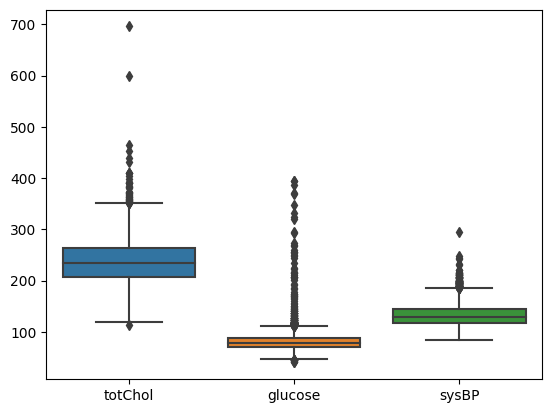

In [14]:
sns.boxplot(data=df[['totChol','glucose','sysBP']])

In [15]:
outliers=df[df['totChol']>500]
outliers

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


In [16]:
df=df.drop(df[df['totChol']>500].index)

In [17]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# sdf=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [18]:
#sdf

In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
male,3747.0,0.445156,0.497049,0.00,0.000,0.00,1.00,1.0
age,3747.0,49.577796,8.571487,32.00,42.000,49.00,56.00,70.0
currentSmoker,3747.0,0.488391,0.499932,0.00,0.000,0.00,1.00,1.0
cigsPerDay,3747.0,9.007740,11.924715,0.00,0.000,0.00,20.00,70.0
BPMeds,3747.0,0.030424,0.171775,0.00,0.000,0.00,0.00,1.0
prevalentStroke,3747.0,0.005604,0.074663,0.00,0.000,0.00,0.00,1.0
prevalentHyp,3747.0,0.311449,0.463148,0.00,0.000,0.00,1.00,1.0
diabetes,3747.0,0.026955,0.161973,0.00,0.000,0.00,0.00,1.0
totChol,3747.0,236.733387,43.585151,113.00,206.000,234.00,264.00,464.0
sysBP,3747.0,132.352148,22.049704,83.50,117.000,128.00,143.75,295.0


In [20]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [21]:
x=df
y=x.pop(df.columns[-1])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3747, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=2,solver='liblinear',max_iter=1000)
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.8595555555555555

In [26]:
confusion_matrix(y_test,pred)

array([[957,   1],
       [157,  10]], dtype=int64)

In [27]:
import pickle
with open('classifier.pkl','wb') as f:
    pickle.dump(classifier,f)

In [28]:
a=pickle.load(open('classifier.pkl','rb'))

In [29]:
a.predict([[1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,75]])

array([1], dtype=int64)